In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from data import scaler, X_train, X_test, y_train, y_test  
from logistic_regression import logisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
#grid search
learning_rates = [0.5, 0.1, 0.05, 0.01,0.001]
max_iters_list = [200, 250, 500, 700, 1000]
epsilons = [1e-2, 1e-4, 1e-6]

best_params = None
best_score = 0

for lr, max_iter, eps in product(learning_rates, max_iters_list, epsilons):
    model = logisticRegression(learning_rate=lr, max_iters=max_iter, epsilon=eps)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_score:
        best_score = acc
        best_params = (lr, max_iter, eps)

print(best_params)

(0.05, 700, 0.01)


In [120]:
model = logisticRegression(learning_rate=best_params[0], max_iters=best_params[1], epsilon=best_params[2])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      1.00      1.00         7
           2       0.90      1.00      0.95         9
           3       1.00      0.79      0.88        14

    accuracy                           0.92        36
   macro avg       0.91      0.95      0.92        36
weighted avg       0.93      0.92      0.92        36



<function matplotlib.pyplot.show(close=None, block=None)>

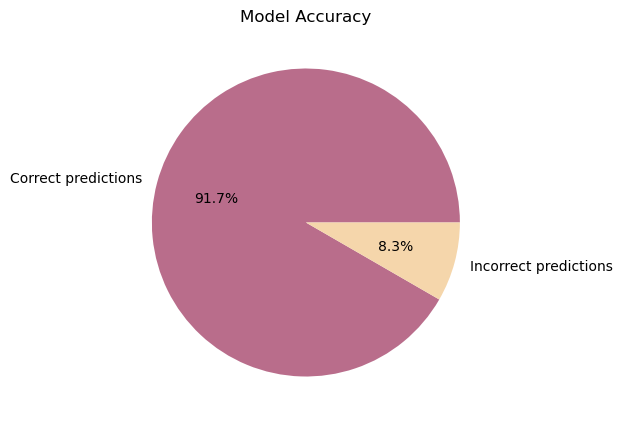

In [122]:
#pie chart for accuracy
accuracy = accuracy_score(y_test, y_pred)
labels = ['Correct predictions', 'Incorrect predictions']
sizes = [accuracy, 1-accuracy]
colors = ['#b96d8b', '#f5d6ab']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Model Accuracy')
plt.show

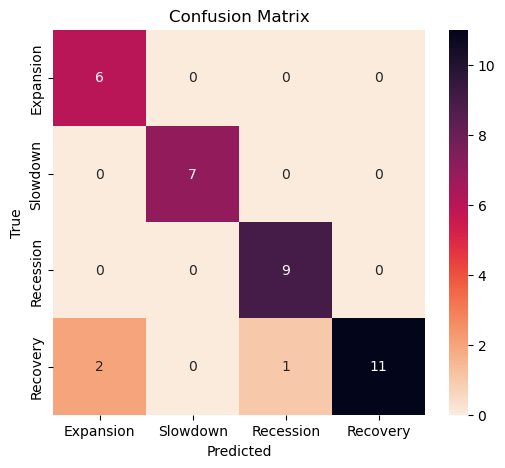

In [124]:
#confusion matrix
#'Expansion':0; 'Slowdown':1; 'Recession':2; 'Recovery':3;
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Expansion', 'Slowdown', 'Recession', 'Recovery'], yticklabels=['Expansion', 'Slowdown', 'Recession', 'Recovery'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()